In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [2]:
# sample meta-data
#this is the path file for desktop
#sample_info = pd.read_csv('C:/Users/lorte/Documents/data/IPTS_27405_reduced/IPTS_27405_Sample_Info.csv')
#this is path file for laptop
sample_info = pd.read_csv('C:/Users/lorte/Documents/data/sans/IPTS_27405_reduced/IPTS_27405_Sample_Info.csv')
path = os.getcwd()
figurepath = path + '/figures'

# helpful meta-data dictionaries
names = dict(zip(sample_info['Sample'], sample_info['Name']))
matrix = dict(zip(sample_info['Sample'], sample_info['Matrix Polymer']))
solvent_names = dict(zip(sample_info['Sample'], sample_info['Solvent']))

# target concentrations of polymer
target_CP = dict(zip(sample_info['Sample'], sample_info['Target CP Concentration']))
target_matrix = dict(zip(sample_info['Sample'], sample_info['Target Matrix Concentration']))

In [3]:
#read in the data
#path file for desktop
#data_dir = 'C:/Users/lorte/Documents/data/IPTS_27405_reduced/'
#path file for laptop
data_dir = 'C:/Users/lorte/Documents/data/sans/IPTS_27405_reduced/'

files = os.listdir(data_dir)
sans_data = {}
for file in files:
    if 'merged' in file:
        key = int(file.split('_')[0][1:])
        sans_data[key] = pd.read_csv(data_dir + file, header = 2, delimiter = "\t", names = ['Q', 'I', 'DI', 'DQ'], nrows = 115)

#cutting the data 
for sample in sans_data.keys():
    sans_data[sample] = sans_data[sample][sans_data[sample].I > 0]
    sans_data[sample] = sans_data[sample][sans_data[sample].Q > 0.003]

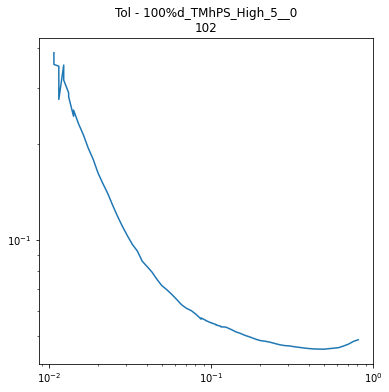

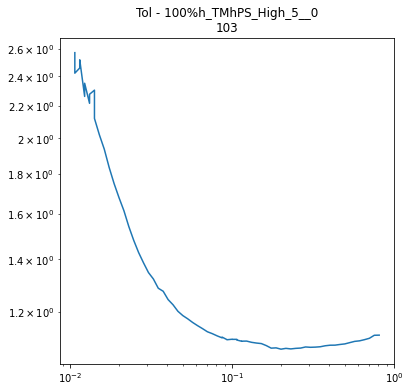

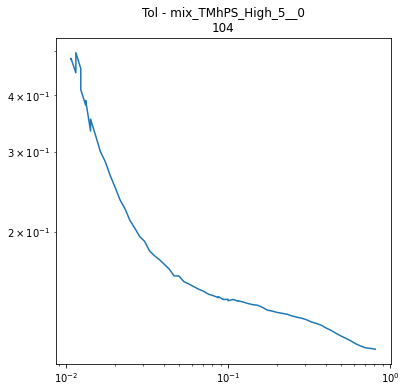

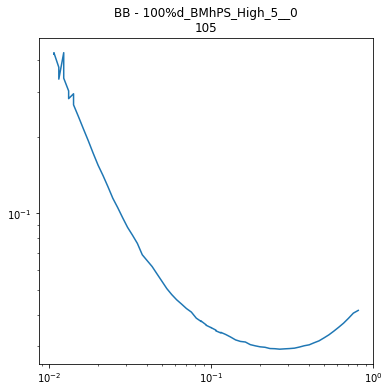

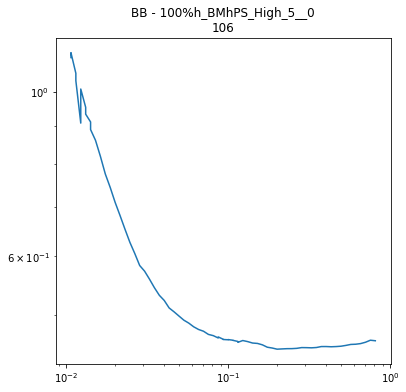

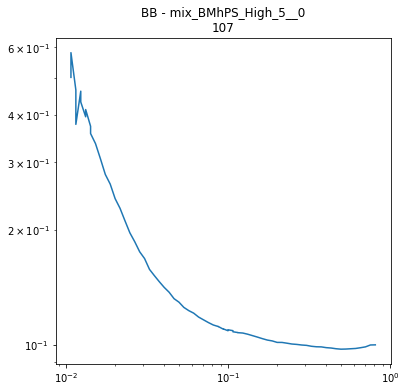

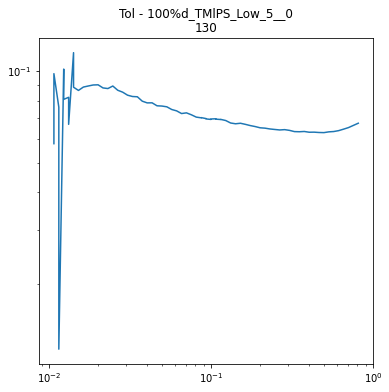

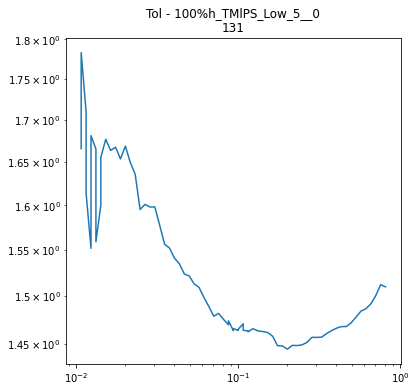

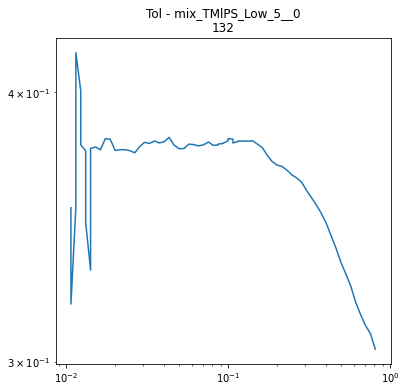

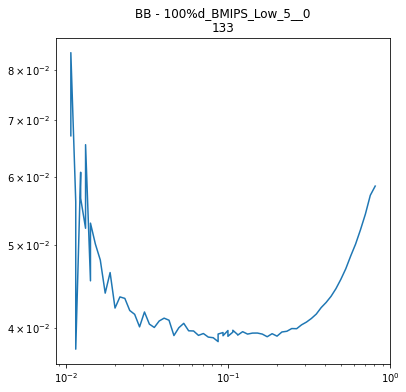

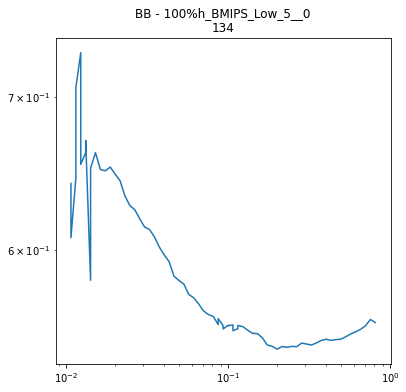

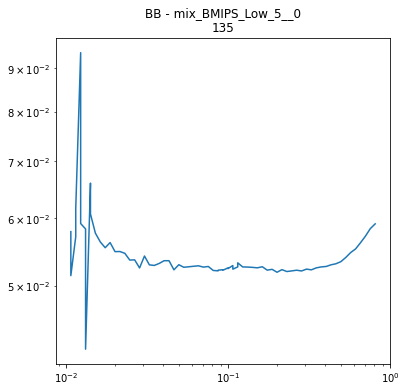

In [4]:
#cutting and replotting
sans_data_cut = {}
for sample in sans_data.keys():
    #this if statement identifies only the samples with 0 CP, the contrast matching ones
    if target_CP[sample] == 0:
        #this line cutes the low Q data, eliminating noise. First run this cell with 0, then set a number based on how the plots look
        sans_data_cut[sample] = sans_data[sample][sans_data[sample].Q > 0.01]
        plt.figure(figsize = (6,6))
        plt.plot(sans_data_cut[sample].Q, sans_data_cut[sample].I)
        plt.title(names[sample]+"\n" +str(sample))
        plt.xscale('log')
        plt.yscale('log')
        
sans_data_bs = {}

<ipython-input-50-8aa611958836>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sans_data_bs[sample]['I'] = sans_data_bs[sample]['I']-background


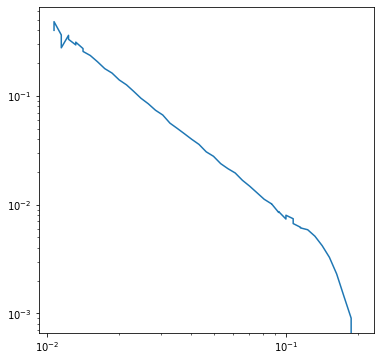

In [50]:
# sample by sample background subtraction
sample = 107

#background substraction and cut

#background_loc_Q = 0.1
background_loc_Q = 0.2009233
#background_loc_Q = 0.3053856
#background_loc_Q = 0.4037017
#background_loc_Q = 0.4977024

background_loc = sans_data_cut[sample][sans_data_cut[sample]['Q'] == background_loc_Q].index.values
background = sans_data_cut[sample]['I'][background_loc].values[0]

sans_data_bs[sample] = sans_data_cut[sample][sans_data_cut[sample].Q <= background_loc_Q]
sans_data_bs[sample]['I'] = sans_data_bs[sample]['I']-background

plt.figure(figsize = (6,6))
plt.plot(sans_data_bs[sample].Q, sans_data_bs[sample].I)
plt.xscale('log')
plt.yscale('log')

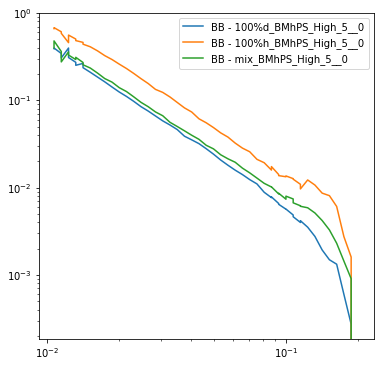

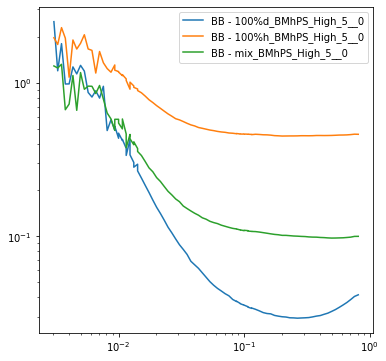

In [51]:
#samples = [102,103,104]
samples = [105,106,107]
plt.figure(figsize = (6,6))
for sample in samples:
    plt.plot(sans_data_bs[sample].Q, sans_data_bs[sample].I, label = names[sample])
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

plt.figure(figsize = (6,6))    
for sample in samples:
    plt.plot(sans_data[sample].Q, sans_data[sample].I, label = names[sample])
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

LinregressResult(slope=-1.8438975800626576, intercept=-9.27603150511641, rvalue=-0.9922880950875556, pvalue=8.91093454493514e-18, stderr=0.05428997776614962) 42
LinregressResult(slope=-1.5822956981451899, intercept=-7.563933265916559, rvalue=-0.9941087622611647, pvalue=7.946609206323946e-19, stderr=0.040662604124400904) 42
LinregressResult(slope=-1.7490393299371274, intercept=-8.802157663247087, rvalue=-0.9889450490812454, pvalue=2.25025806800754e-16, stderr=0.061813162532896246) 42


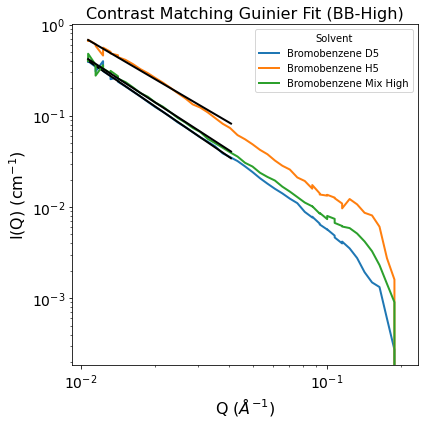

In [52]:
#deuteration fitting
plt.figure(figsize = (6,6))
samples = [105,106,107]
depth = 0.03
title = "Contrast Matching Guinier Fit (BB-High)"
legend_title = 'Solvent'
for sample in samples:
        xval = sans_data_bs[sample][sans_data_bs[sample].Q < depth]["Q"]
        yval = sans_data_bs[sample][sans_data_bs[sample].Q < depth]["I"]
        result = stats.linregress(np.log(xval),np.log(yval))
        print(result, xval.first_valid_index())
        xval1 = np.linspace(xval[xval.first_valid_index()],xval[xval.first_valid_index()]+depth,100)
        yval1 = np.exp(np.log(xval1)*result.slope + result.intercept)
        plt.plot(sans_data_bs[sample]['Q'],sans_data_bs[sample]['I'], label = solvent_names[sample],lw =2)
        plt.plot(xval1,yval1, color = 'k', lw = 2)
        
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'Q ($\AA^{-1}$)', fontsize=16)
plt.ylabel(r'I(Q) (cm$^{-1}$)', fontsize=16)

legend = plt.legend(fontsize=10, title=legend_title)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim(1e-03, 1e11)
#plt.xlim(0.00002, 0.3)
    
plt.title(title, fontsize=16)
    
plt.tight_layout()

plt.savefig(figurepath + "/"  + title, dpi=600)

In [53]:
start = 0.02
stop = 0.04
samples = [105,106,107]
for sample in samples:
    integral = sans_data_bs[sample][sans_data_bs[sample].Q < stop][sans_data_bs[sample].Q > start]["I"]
    print(solvent_names[sample], sum(integral))

Bromobenzene D5 0.7541832399999999
Bromobenzene H5 1.5695318999999999
Bromobenzene Mix High 0.845693


<ipython-input-53-cfa365c7f4cf>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  integral = sans_data_bs[sample][sans_data_bs[sample].Q < stop][sans_data_bs[sample].Q > start]["I"]
<ipython-input-53-cfa365c7f4cf>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  integral = sans_data_bs[sample][sans_data_bs[sample].Q < stop][sans_data_bs[sample].Q > start]["I"]
<ipython-input-53-cfa365c7f4cf>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  integral = sans_data_bs[sample][sans_data_bs[sample].Q < stop][sans_data_bs[sample].Q > start]["I"]


In [178]:
#integrate the linear fit and make plots for contrast matching
def log_func(x,m,b):
    return np.exp(np.log(x)*m+b)

samples = [102,103,104]
for sample in samples:
        xval = sans_data[sample]["Q"]
        yval = sans_data[sample]["I"]
        result = stats.linregress(np.log(xval[:depth]),np.log(yval[:depth]))
        xval1 = np.linspace(xval[0],1,100)
        yval1 = np.exp(np.log(xval1)*result.slope + result.intercept)
        approx = scipy.integrate.quad(log_func,xval[0],1,args = (result.slope,result.intercept))
        print(str(sample) + str(approx))

102(0.07538314368670972, 4.0818241347771495e-09)
103(0.06291287192096702, 9.9896056227689e-11)
104(0.028668034281510678, 6.493072460275719e-11)
105(0.017772423474909572, 1.2456160250864888e-11)


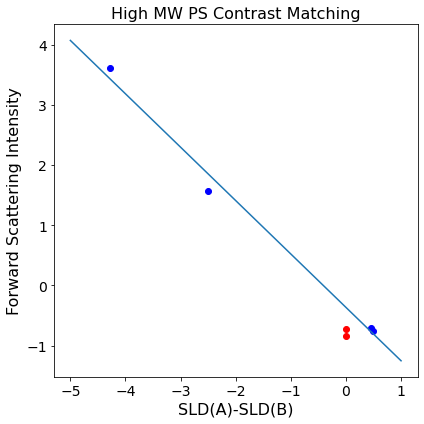

In [66]:
plt.figure(figsize = (6,6))
title = "High MW PS Contrast Matching"
SLD = [5.664-5.216,0.941-5.216,4.611-4.12,1.61-4.12]
Intensity = [-0.7,3.613,-0.754,1.569]
plt.plot(SLD,Intensity, 'bo')
line = stats.linregress(SLD,Intensity)
linex = np.linspace(-5,1,10)
liney = linex*line.slope +line.intercept
plt.plot(linex,liney)

SLD1 = [0,0]
Intensity1 = [-0.716,-0.8457]
plt.plot(SLD1,Intensity1, 'ro')

plt.xlabel('SLD(A)-SLD(B)', fontsize=16)
plt.ylabel('Forward Scattering Intensity', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim(1e-03, 1e11)
#plt.xlim(0.00002, 0.3)
    
plt.title(title, fontsize=16)
    
plt.tight_layout()